-------------------- info --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
-------------------- describe --------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000  

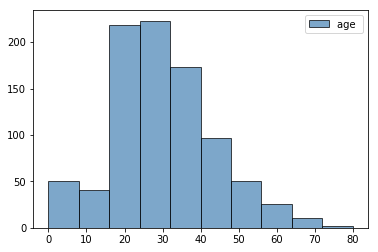

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def assign_random_values(series):
    mean = series.mean()
    std = series.std()
    is_null = series.isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_values = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values with random values generated
    series_slice = series.copy()
    series_slice[np.isnan(series)] = rand_values
    series = series_slice
    #series[np.isnan(series)] = rand_values
    series = series.astype(int)
    return series


def draw_hist(titanic):
    _ = plt.hist(titanic.Age, 
        bins = 10, # 指定直方图的的区间, 划分为10组
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = 'age ',# 指定标签
        alpha = 0.7 )# 指定透明度

    _ = plt.legend()
    
    plt.show()


def explore():

    titanic = pd.read_csv('./train.csv')
    titanic_test = pd.read_csv('./test.csv')

    titanic.head()


    print('-'*20 , 'info', '-'*20)
    print(titanic.info())

    print('-'*20 , 'describe', '-'*20)
    print(titanic.describe())


    print('-'*20, 'isnull', '-'*20)
    #查看哪些记录包含无效数据(null)
    print(titanic.isnull().sum())

    # 过滤掉价值不大且不完整的字段, 如 Cabin 座舱号
    titanic = titanic.drop(['Cabin'], axis=1)

    # 为 null 值设置随机值
    print("age is null", titanic["Age"].isnull().sum())
    titanic['Age'] = assign_random_values(titanic['Age'])
    print("age is null", titanic["Age"].isnull().sum())

    # 过滤掉没有年龄的记录
    #titanic.dropna(subset=['Age'], inplace=True)
    
    
    titanic.groupby('Embarked').count()
    
    return titanic

    
if __name__ == "__main__":
    titanic = explore()
    draw_hist(titanic)